In [1]:
from PIL import Image
from io import BytesIO
import os, sys, requests, json, random, math, imageio, shutil, glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from skimage.filters import threshold_otsu
from skimage.io import imread, imsave
from skimage.color import rgb2gray
from skimage.measure import label, regionprops
import imgaug as ia
from imgaug import augmenters as iaa
from imgaug.augmentables.bbs import BoundingBox, BoundingBoxesOnImage
sys.path.append('../preprocessing')
from utility import crop_img, removeBorderBox, xyxy2xcycwh

In [2]:
phase_count = {
    "train": 1,
    "test": 1
}

In [ ]:
# get images from pf_ext
# labels = os.path.join('Pf_ext_01.json')

count = 1

phase = "train"

data = (requests.get('https://raw.githubusercontent.com/RTANC/malaria_dataset/master/Falciparum/pf-ext-copy.json')).json()
images = data["_via_img_metadata"]
for key in images:
    url = images[key]["filename"]
    leng = len(images[key]["regions"])
    bboxs = ""
    if leng > 0 and count <= 20:
        print("{} {}".format(count,url))
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        w, h = img.size
        rects = []
        for box in images[key]["regions"]:
            b = box["shape_attributes"]
            lbl = box["region_attributes"]["type"]
            if lbl == "2":
                lbl = "1"
            elif lbl == "1":
                lbl = "0"
            rects.append(BoundingBox(x1=b["x"],y1=b["y"],x2=(b["x"] + b["width"]),y2=(b["y"] + b["height"]),label=int(lbl)))
            
        img = np.array(img)
        bbs = BoundingBoxesOnImage(rects,shape=img.shape)
        phase_count = crop_img(img, bbs, phase_count, offset=15)
        break

In [ ]:
print(phase_count["train"])

In [ ]:
# get image from pf_01
# labels = os.path.join('pf_01.json')
count = 1
# degs = [45,90,135,180,225,270,315]
data = (requests.get('https://raw.githubusercontent.com/RTANC/malaria_dataset/master/Falciparum/pf_01-copy.json')).json()
images = data["_via_img_metadata"]
for key in images:
    url = images[key]["filename"]
    leng = len(images[key]["regions"])
    bboxs = ""
    if leng > 0 and count <= 820:
        print("{} {}".format(count,url))
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        w, h = img.size
        rects = []
        for box in images[key]["regions"]:
            b = box["shape_attributes"]
            lbl = box["region_attributes"]["type"]
            rects.append(BoundingBox(x1=b["x"],y1=b["y"],x2=(b["x"] + b["width"]),y2=(b["y"] + b["height"]),label=int(lbl)))
            
        img = np.array(img)
        bbs = BoundingBoxesOnImage(rects,shape=img.shape)
        phase_count = crop_img(img, bbs, phase_count, offset=15)
        break

In [ ]:
print(phase_count["train"])

1 https://raw.githubusercontent.com/RTANC/malaria_dataset/master/Falciparum/pf_test/16.jpg


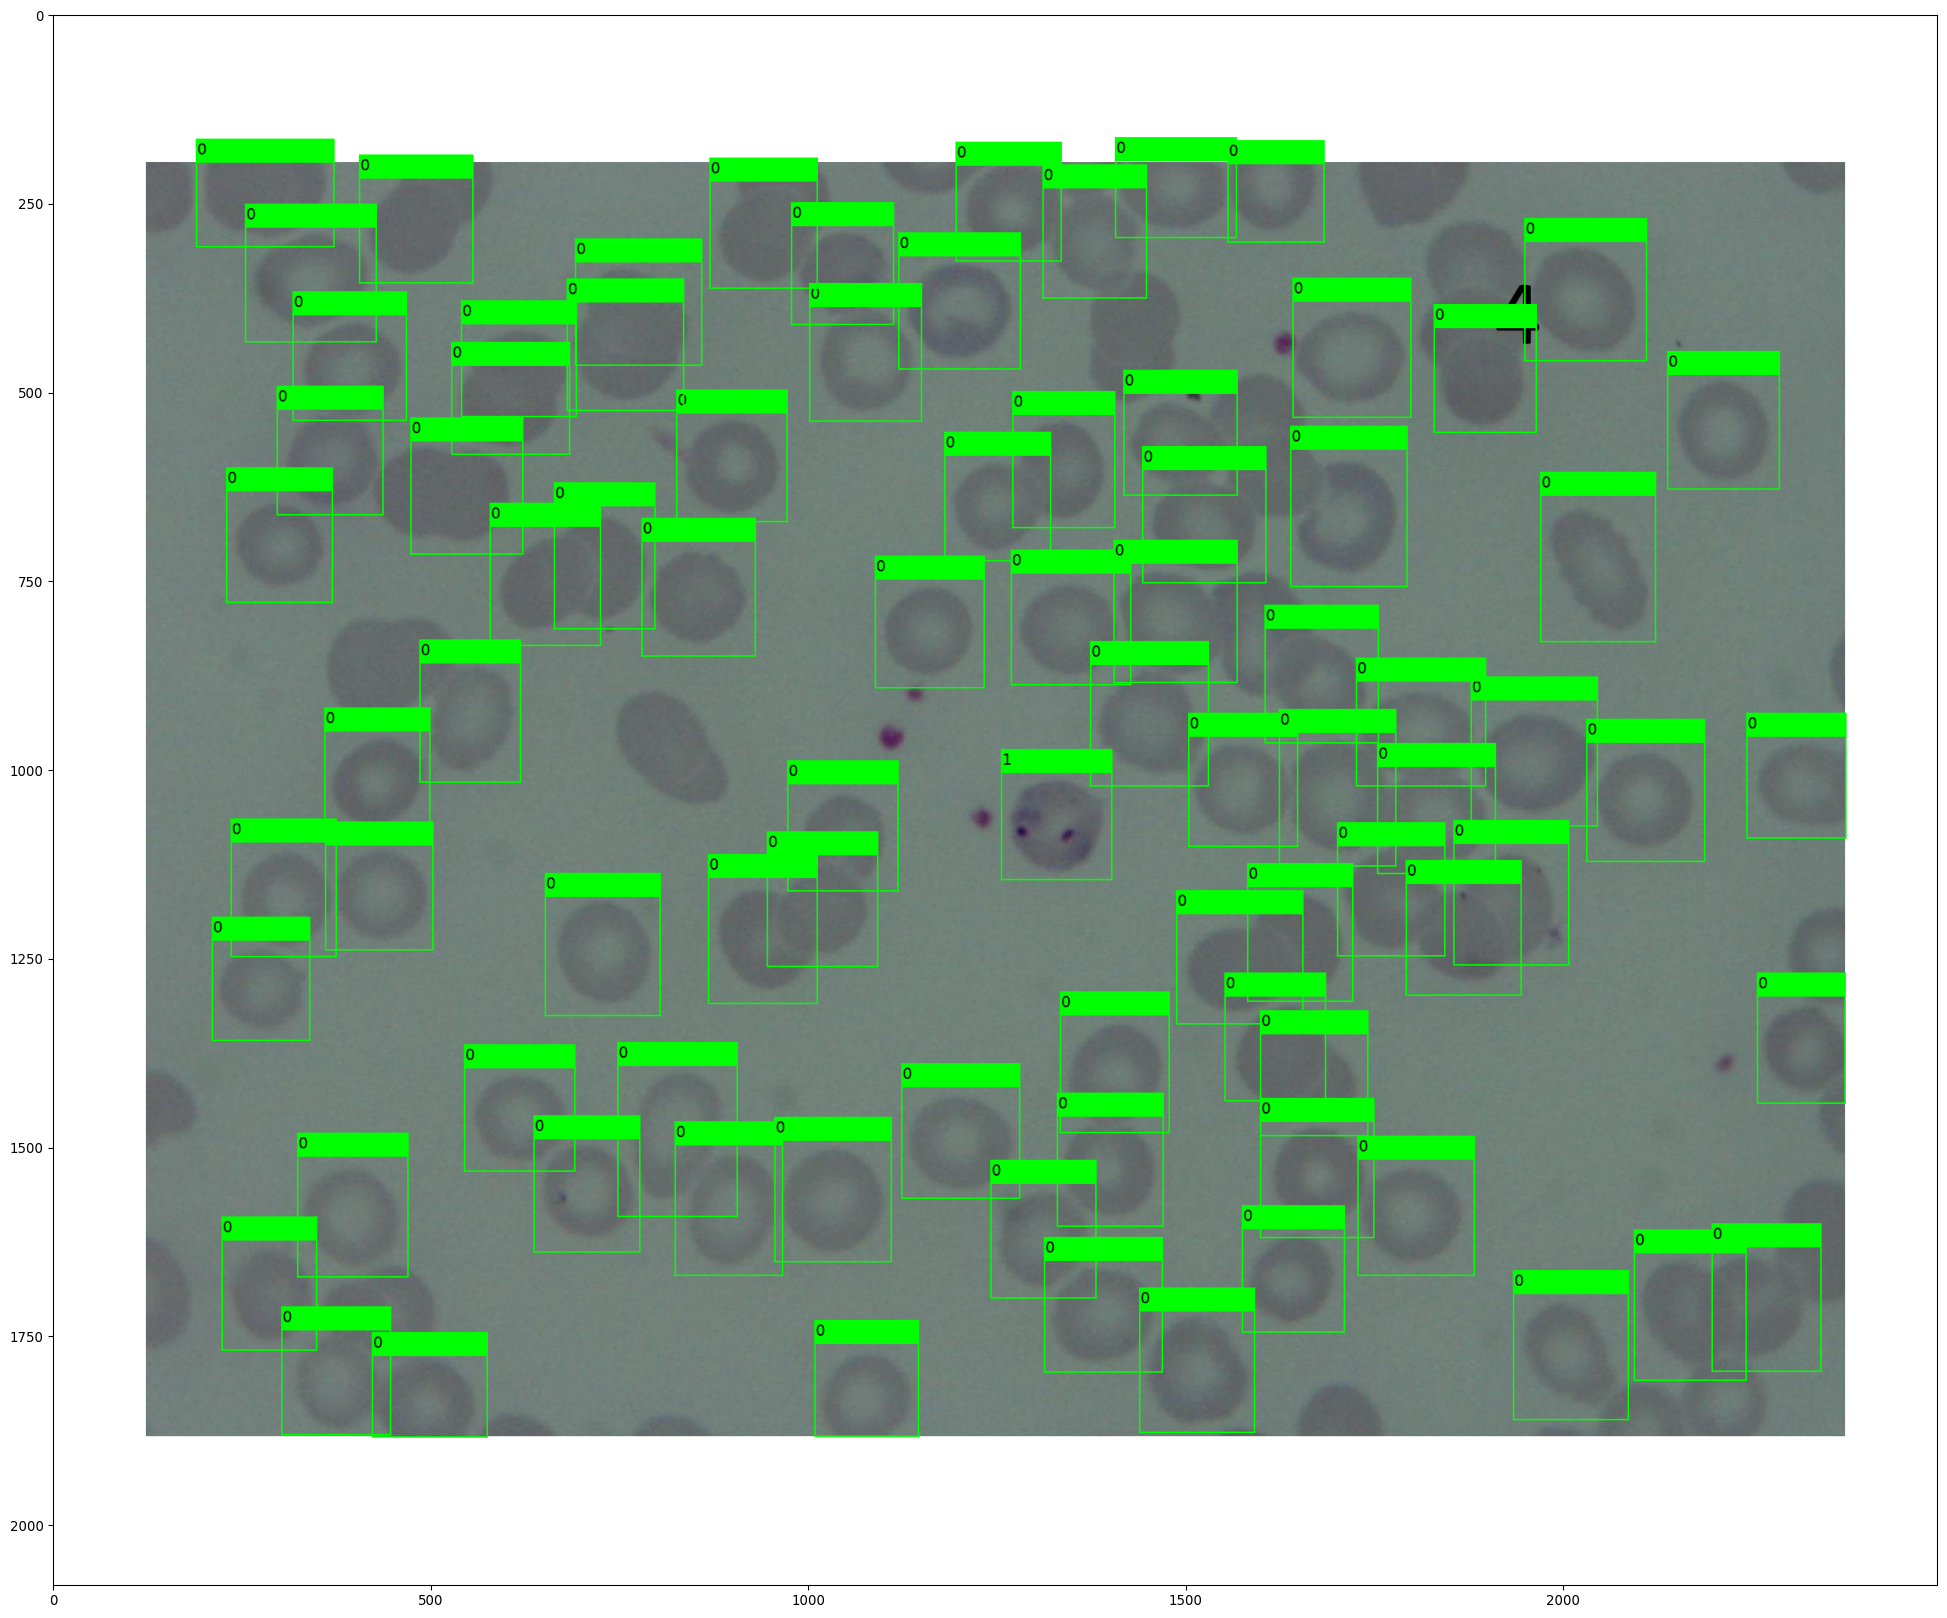

0 0
1.0 1.0
pf-test-0000000001-0000000001
0 417
1.0 0.8329326923076923
pf-test-0000000001-0000000002
0 834
1.0 0.6658653846153846
pf-test-0000000001-0000000003
0 1251
1.0 0.49879807692307687
pf-test-0000000001-0000000004
0 1668
1.0 0.3317307692307693
pf-test-0000000001-0000000005
0 2085
1.0 0.16466346153846156
pf-test-0000000001-0000000006
417 0
0.7995192307692307 1.0
pf-test-0000000001-0000000007
417 417
0.7995192307692307 0.8329326923076923
pf-test-0000000001-0000000008
417 834
0.7995192307692307 0.6658653846153846
pf-test-0000000001-0000000009
417 1251
0.7995192307692307 0.49879807692307687
pf-test-0000000001-0000000010
417 1668
0.7995192307692307 0.3317307692307693
pf-test-0000000001-0000000011
417 2085
0.7995192307692307 0.16466346153846156
pf-test-0000000001-0000000012
834 0
0.5990384615384615 1.0
pf-test-0000000001-0000000013
834 417
0.5990384615384615 0.8329326923076923
pf-test-0000000001-0000000014
834 834
0.5990384615384615 0.6658653846153846
pf-test-0000000001-0000000015
834

In [4]:
# get image from pf_test
# labels = os.path.join('pf_test.json')

count = 1

phase = "test"
phase_count[phase] = 1

data = (requests.get('https://raw.githubusercontent.com/RTANC/malaria_dataset/master/Falciparum/pf_test.json')).json()
images = data["_via_img_metadata"]
for key in images:
    url = images[key]["filename"]
    leng = len(images[key]["regions"])
    bboxs = ""
    if leng > 0:
        name = "pf-" + phase + "-{:010d}".format(phase_count[phase])
        print("{} {}".format(count,url))
        # print(name)
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        w, h = img.size
        rects = []
        for box in images[key]["regions"]:
            b = box["shape_attributes"]
            lbl = box["region_attributes"]["type"]
            rects.append(BoundingBox(x1=b["x"],y1=b["y"],x2=(b["x"] + b["width"]),y2=(b["y"] + b["height"]),label=int(lbl)))
        img = np.array(img)
        bbs = BoundingBoxesOnImage(rects,shape=img.shape)
        wp = w + (416 - (w % 416))
        hp = h + (416 - (h % 416))

        img_pad, bbs_pad = iaa.PadToFixedSize(width=hp, height=hp, pad_mode="constant", pad_cval=255, position="center")(image=img, bounding_boxes=bbs)
        ia.imshow(bbs_pad.draw_on_image(img_pad, size=2))
        sub_count = 1
        for row in range(0, hp, 417):
            for col in range(0, wp, 417):
                yc = 1 - (row / hp)
                xc = 1 - (col / wp)
                print("{} {}".format(row, col))
                print("{} {}".format(yc, xc))
                img_crop, bbs_crop = iaa.CropToFixedSize(width=416, height=416, position=(xc, yc))(image=img_pad,bounding_boxes=bbs_pad)
                bbs_crop = bbs_crop.remove_out_of_image(fully=True,partly=False).clip_out_of_image()
                bbs_crop, _ = removeBorderBox(img_crop, bbs_crop)
                # ia.imshow(bbs_crop.draw_on_image(img_crop, size=2))
                bbox_txt = ""
                for bb in bbs_crop:
                    xc, yc, bw, bh, bb.label = xyxy2xcycwh(bb, 416, 416)
                    bbox_txt += "\n"+ str(bb.label) + " " + str(xc) + " " + str(yc) + " " + str(bw) + " " + str(bh)
                bbox_txt = bbox_txt[1:]
                # print(bbox_txt)
                img_crop = Image.fromarray(img_crop)
                sub_name = name + "-{:010d}".format(sub_count)
                img_crop.save(os.path.join("../malaria/images/val",sub_name+".jpg"))
                f = open(os.path.join("../malaria/labels/val",sub_name+".txt"),'w')
                f.write(bbox_txt)
                f.close()
                print(sub_name)
                sub_count += 1
        count += 1
        phase_count[phase] += 1
        break

In [ ]:
print(img_pad.shape)

In [ ]:
# get image from pf_02 (Test set)
# labels = os.path.join('pf_02.json')

count = 1

phase = "test"
degs = [45,90,135,180,225,270,315]

data = (requests.get('https://raw.githubusercontent.com/RTANC/malaria_dataset/master/Falciparum/pf_02.json')).json()
images = data["_via_img_metadata"]
for key in images:
    url = images[key]["filename"]
    leng = len(images[key]["regions"])
    bboxs = ""
    if leng > 0 and count <= 100:
        name = "pf-" + phase + "-{:010d}".format(phase_count[phase])
        print("{} {}".format(count,url))
        print(name)
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        w, h = img.size
        img.save(os.path.join('../data/custom/images',name+".jpg"))
        f = open(os.path.join('../data/custom/labels',name+".txt"),'w')
        for box in images[key]["regions"]:
            b = box["shape_attributes"]
            x1 = b["x"]/w
            y1 = b["y"]/h
            bw = b["width"]/w
            bh = b["height"]/h
            xc = x1 + (bw/2)
            yc = y1 + (bh/2)
            lbl = box["region_attributes"]["type"]
            if lbl == "2":
                lbl = "1"
                bboxs += "\n"+ lbl + " " + str(xc) + " " + str(yc) + " " + str(bw) + " " + str(bh)
            elif lbl == "0":
                lbl = "0"
                bboxs += "\n"+ lbl + " " + str(xc) + " " + str(yc) + " " + str(bw) + " " + str(bh)
        bboxs = bboxs[1:]
        f.write(bboxs)
        f.close()
        phase_count[phase] += 1
    count += 1